# Bank Marketing

## Problem Statement

The dataset is pertaining to the ***direct marketing campaigns*** of a banking institution based out of Portugal. 

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This report presents the **univariate analysis** of the various variables present in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

## Attribute Description

Input variables:

### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Basic exploration of the dataset

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

The dataset has 41188 rows and 21 columns where each column represents an attribute and each row represents a data point.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in our dataset.

### Descriptive statistics summary of the variables of our dataset

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the summary statistics we can observe that:
1. Our customers range from age 17 to 98, with a median age of 38.
2. Our customers work in 12 different job types with admin being the most frequent job type.
3. Most of our customers are married.
4. Most of our customers have a university degree as their education.
5. Most of our customers do not have a default.
6. Most of our customers have taken a housing loan but most of them do not have a personal loan.



## Univariate Analysis

### Age

In [8]:
df.age.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


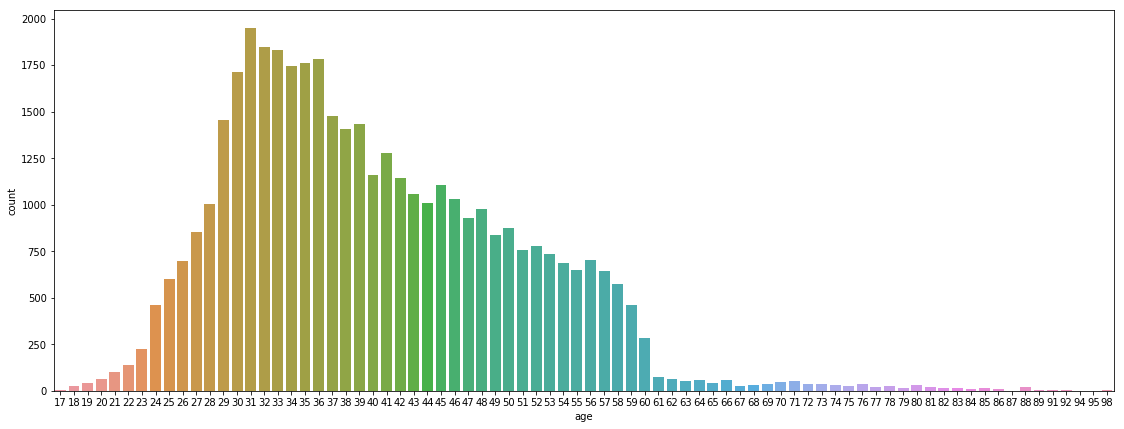

In [9]:
plt.figure(figsize=(19,7))
sns.countplot(x = df['age'])

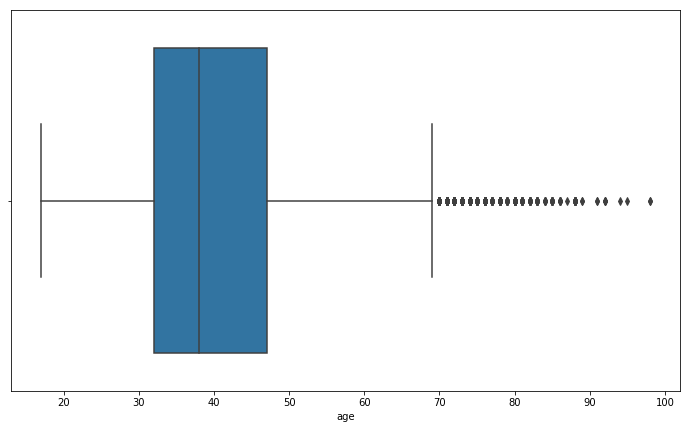

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(x = df['age'])

1. Most of the customers fall between 28 and 42 years.
2. Our distribution is right skewed, implying that few customers are older than 60 years.
3. The median age of our customers is 38.

### Job

In [11]:
df['job'].describe().to_frame().T

,count,unique,top,freq
job,41188,12,admin.,10422


In [12]:
df['job'].value_counts().to_frame()

,job
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


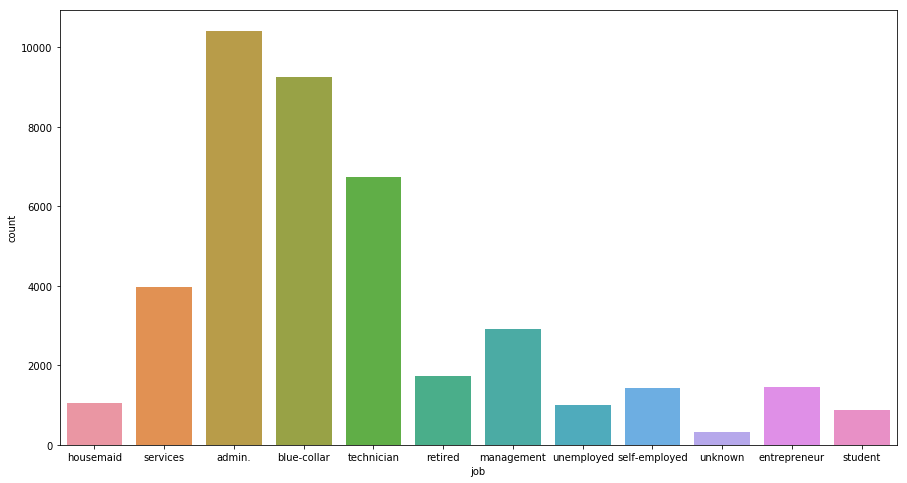

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(df['job'])

Of the 12 different jobs of our customers, Admin, blue-collar and technician are the top 3 job roles respectively.

### Marital Status

In [14]:
df['marital'].describe().to_frame().T

,count,unique,top,freq
marital,41188,4,married,24928


In [15]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

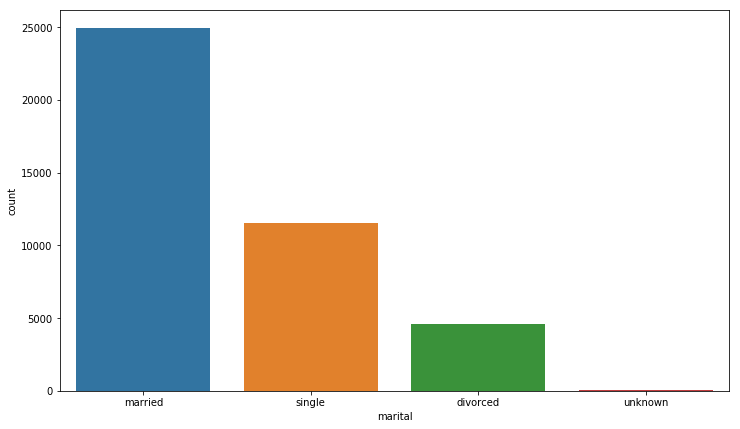

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(df['marital'])

The distribution of marital attribute suggests that most of our customers are either Married or Single

### Education

In [17]:
df['education'].describe().to_frame().T

,count,unique,top,freq
education,41188,8,university.degree,12168


In [18]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Most of our customers have university education and almost all of them are educated. 18 of our customers are illiterate. Our marketing campaign has been targeted at educated individuals as they might be working professionals.

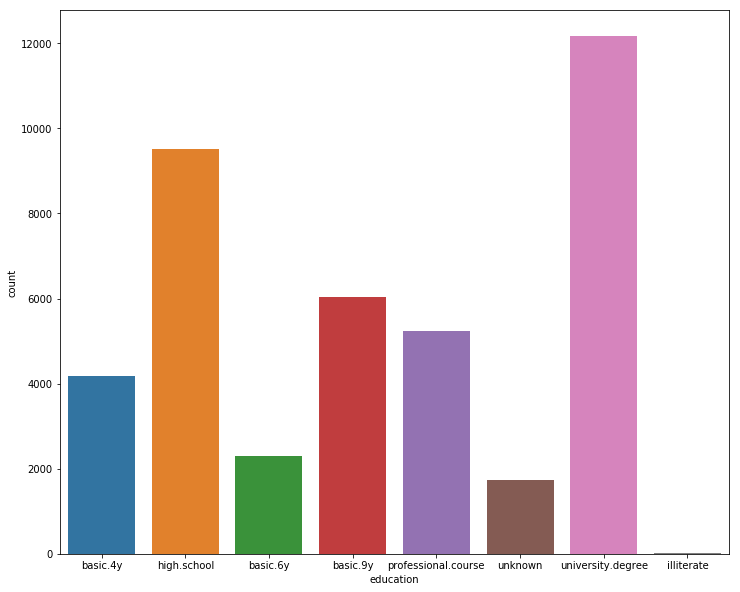

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(df['education'])

### Analysis of loan related features - default, personal and Housing

In [20]:
df[['default','loan','housing']].describe().T

,count,unique,top,freq
default,41188,3,no,32588
loan,41188,3,no,33950
housing,41188,3,yes,21576


Most of our targeted customers do not have a credit card default and a personal loan. However, a majority of them have taken personal loans.

### Default

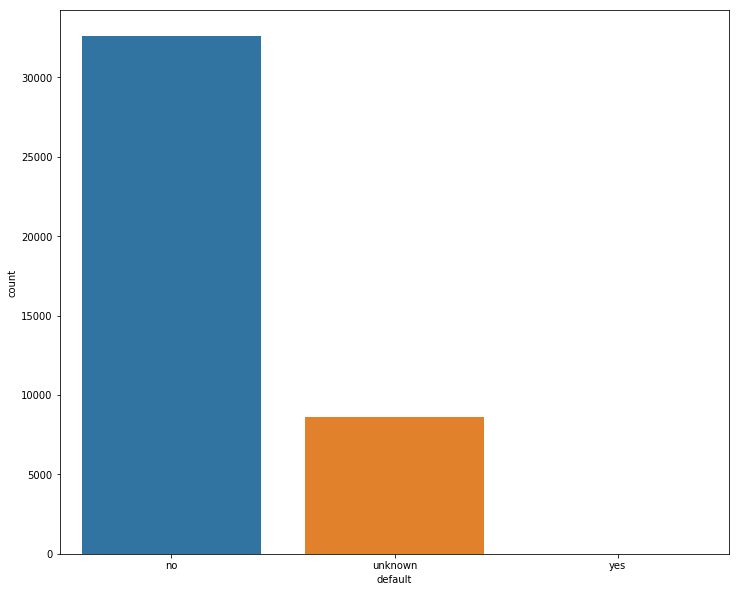

In [23]:
plt.figure(figsize=(12,10))
sns.countplot(df.default)

### Loan

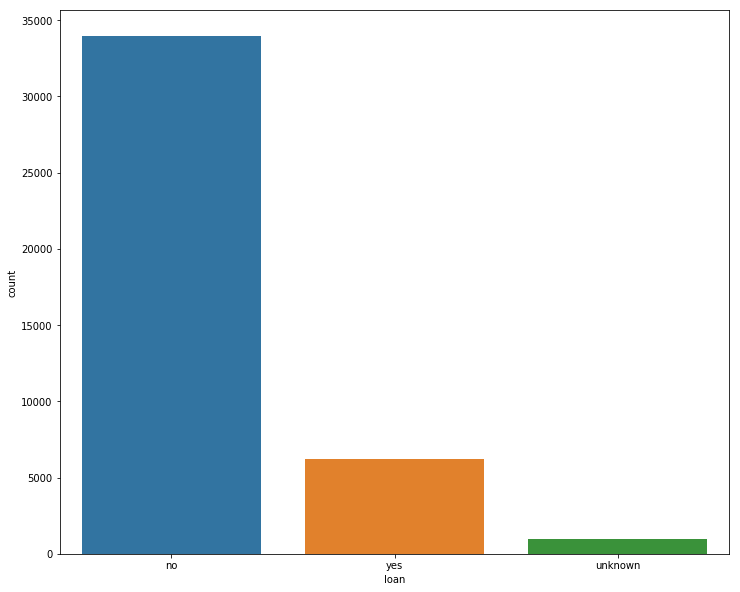

In [22]:
plt.figure(figsize=(12,10))
sns.countplot(df.loan)

### Housing

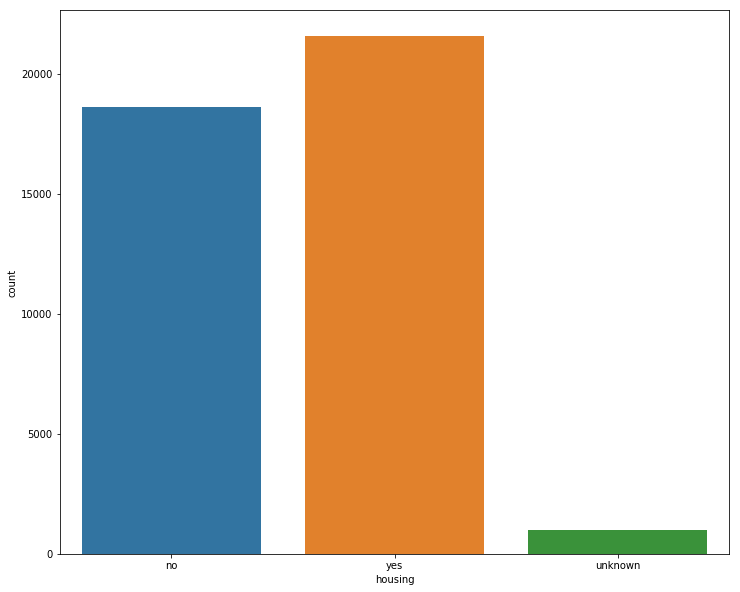

In [24]:
plt.figure(figsize=(12,10))
sns.countplot(df.housing)

It can be observed that the majority of targeted customers have taken housing loans. But a considerable number of them do not have housing loans as well.